# Feigenbaum-Diagramm mit Lyapunov-Exponenten

Zuerst importieren wir die benötigten Pakete Numpy und die Matplotlib

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

Dann implementieren wir die logistische Funktion

In [10]:
def logistic(r, x):
    return r*x*(1-x)

In [11]:
n = 10000
r = np.linspace(2.5, 4.0, n)

Das Programm soll 1.000 Iterationen der logistischen Gleichung durchlaufen und die letzten 100 sollen für das Bifurkations-Diagramm genutzt werden.

In [12]:
iterations = 1000
last = 100

Wir initialisieren das System mit $x_0 = 0.00001$:

In [5]:
x = 1e-5 * np.ones(n)

Zur Berechnung des Lyanpunov-Exponenten initialisieren wir als erstes den `lyapunov`-Vektor:

In [6]:
lyapunov = np.zeros(n)

Und nun noch die Plots ein wenig aufhübschen:

In [7]:
plt.style.use("ggplot")

Nun folgt das eigentliche Programm:

Text(0.5, 1.0, 'Lyapunov-Exponent')

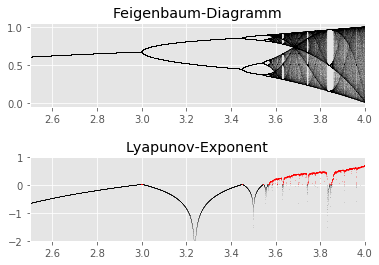

In [8]:
plt.subplots_adjust(hspace = 0.6)

plt.subplot(211)
for i in range(iterations):
    x = logistic(r, x)
    lyapunov += np.log(abs(r - 2*r*x))
    if i >= (iterations - last):
        plt.plot(r, x, ", k", alpha = 0.02)
plt.xlim(2.5, 4)
plt.title("Feigenbaum-Diagramm")

plt.subplot(212)
plt.plot(r[lyapunov < 0], lyapunov[lyapunov < 0]/iterations, ",k", alpha = 0.1)
plt.plot(r[lyapunov >= 0], lyapunov[lyapunov >= 0] / iterations, ",r", alpha = 0.25)
plt.xlim(2.5, 4.0)
plt.ylim(-2, 1)
plt.title("Lyapunov-Exponent")

Wir sehen einen Fixpunkt bei `r < 3.0` und der Lyapunov-Exponent ist positiv (hier in rot markiert), wenn das System chaotisch wird.